# ConvLSTM 
> Conv lstm model

In [1]:
from fastai.vision.all import *
from action_recognition.core import *
from action_recognition.models import *

In [2]:
set_seed(2021)

In [3]:
torch.cuda.set_device(1)
torch.cuda.get_device_name()

'GeForce RTX 2070 SUPER'

In [4]:
data_path = Path.home()/'.fastai/data/UCF101-frames'

In [5]:
instances = get_instances(data_path)

## Params

In [6]:
seq_len = 20
step=5
image_size = 128
bs = 16
val_idxs = None

you could put this split on a text file:

In [7]:
dls = get_action_dataloaders(instances, bs=bs, image_size=image_size, seq_len=seq_len, step=step, val_idxs=val_idxs)

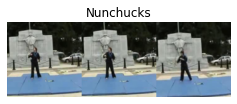

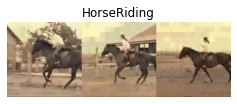

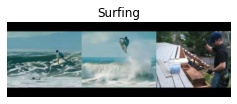

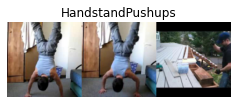

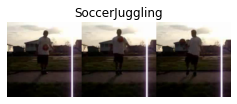

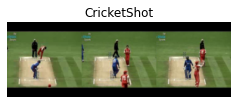

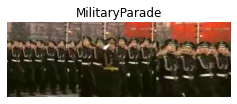

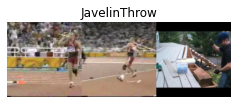

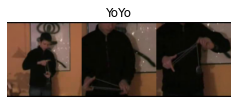

In [8]:
dls.show_batch()

## Train without attention
> We will predict over the hidden state of the sequence.

In [9]:
model = ConvLSTM(num_classes=dls.c, hidden_dim=256, lstm_layers=2, bidirectional=False, attention=False)

In [10]:
learn = Learner(dls, model, metrics=[accuracy, top_k_accuracy], wd=0.1, cbs=[ModelResetter()], splitter=convlstm_splitter).to_fp16()
learn.freeze()

SuggestedLRs(lr_min=0.001096478197723627, lr_steep=0.3630780577659607)

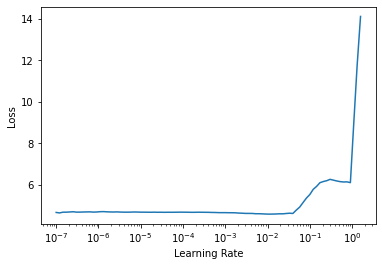

In [11]:
learn.lr_find()

In [12]:
learn.fit_one_cycle(10, 5e-3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.062392,1.744418,0.533033,0.823198,02:13
1,2.723685,2.539017,0.331832,0.680180,02:12
2,3.191405,2.942659,0.255631,0.563438,02:12
3,2.993338,2.761627,0.271021,0.616742,02:13
4,2.661971,2.367558,0.350225,0.698574,02:12
5,2.444875,2.056983,0.439189,0.780030,02:10
6,2.084744,1.793404,0.490240,0.813814,02:09
7,1.717379,1.485952,0.577703,0.873123,02:08
8,1.543957,1.328634,0.625000,0.891517,02:09
9,1.532394,1.325500,0.624249,0.888138,02:09


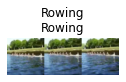

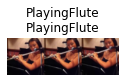

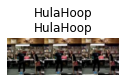

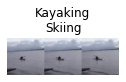

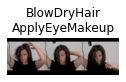

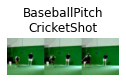

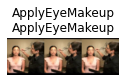

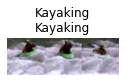

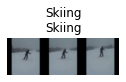

In [18]:
learn.show_results()

## Train with attention
> We will predict with an attention layer over the full output sequence from the LSTM layer.

In [10]:
model2 = ConvLSTM(num_classes=dls.c, hidden_dim=256, lstm_layers=2, bidirectional=True, attention=True)

In [11]:
learn2 = Learner(dls, model2, metrics=[accuracy, top_k_accuracy], wd=0.1, cbs=[ModelResetter()], splitter=convlstm_splitter).to_fp16()
learn2.freeze()

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=0.013182567432522774)

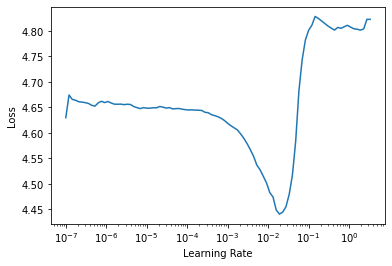

In [12]:
learn2.lr_find()

In [13]:
learn2.fit_one_cycle(12, 5e-3)

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,3.245867,2.438395,0.395646,0.685811,00:38
1,2.374748,2.332893,0.413664,0.709084,00:38
2,2.376780,2.312073,0.414414,0.719970,00:38
3,2.128702,2.028345,0.471471,0.784159,00:38
4,1.892150,1.834152,0.516141,0.816066,00:39
5,1.638733,1.543318,0.588589,0.844219,00:38
6,1.339670,1.245870,0.667042,0.891892,00:38
7,1.030547,0.954757,0.737988,0.930931,00:39
8,0.768623,0.760735,0.792042,0.947072,00:39
9,0.569218,0.666516,0.810060,0.954580,00:39


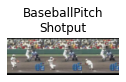

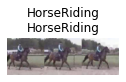

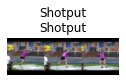

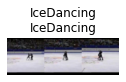

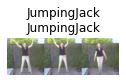

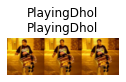

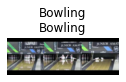

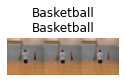

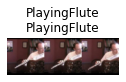

In [14]:
learn2.show_results()